# Waiter Tips Prediction

<img src="images/tip.jpg">

Tipping waiters for serving food depends on many factors like the type of restaurant, how many people you are with, how much amount you pay as your bill, etc. Waiter Tips analysis is one of the popular data science case studies where we need to predict the tips given to a waiter for serving the food in a restaurant. So if you want to learn how to solve this case study, this project is for you. In this project, I will take you through the task of waiter tips prediction with machine learning using Python.

In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [2]:
import joblib
print(joblib.__version__)

1.4.2


In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")

## EDA - Exploratory Data Analysis

In [93]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [94]:
df.shape

(244, 7)

In [95]:
df.isnull().sum()   

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [97]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [98]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [99]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [100]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Data Visualization

In [101]:
# !pip install -U kaleido

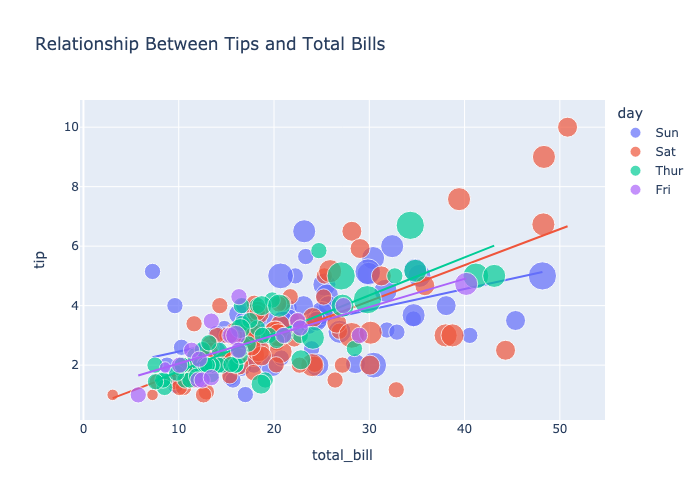

In [102]:
figure = px.scatter(data_frame=df, 
                    x="total_bill", 
                    y="tip", 
                    size="size", 
                    color="day", 
                    trendline="ols",
                    title="Relationship Between Tips and Total Bills")

figure.show('png')

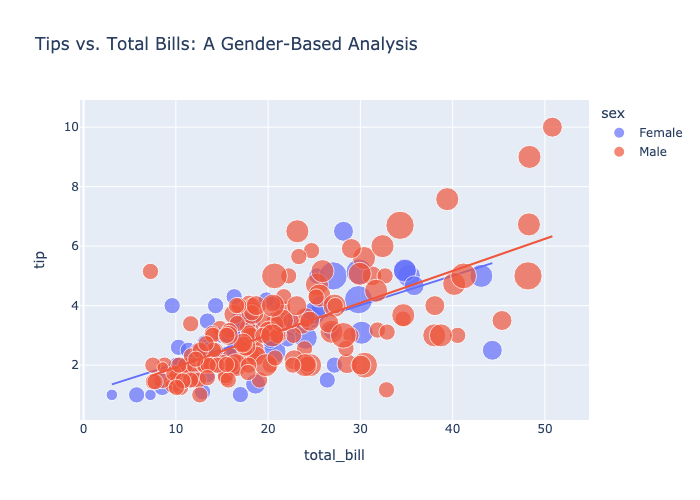

In [103]:
figure = px.scatter(data_frame=df, 
                    x="total_bill", 
                    y="tip", 
                    size="size", 
                    color="sex", 
                    trendline="ols",
                    title="Tips vs. Total Bills: A Gender-Based Analysis") 

figure.show('png')


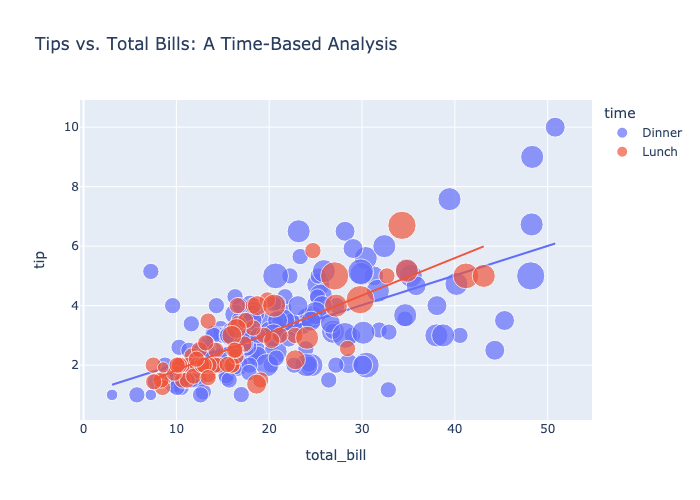

In [104]:
figure = px.scatter(data_frame=df, 
                    x="total_bill", 
                    y="tip", 
                    size="size", 
                    color="time", 
                    trendline="ols",
                    title="Tips vs. Total Bills: A Time-Based Analysis")

figure.show('png')


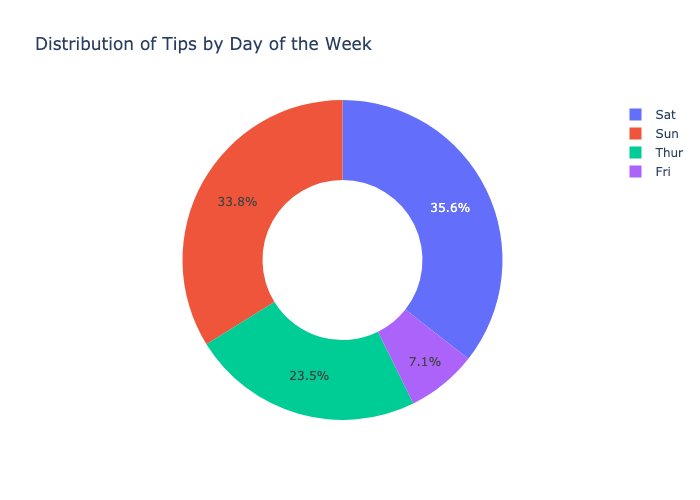

In [105]:
figure = px.pie(df, 
                 values='tip', 
                 names='day', 
                 hole=0.5, 
                 title="Distribution of Tips by Day of the Week")

figure.show('png')

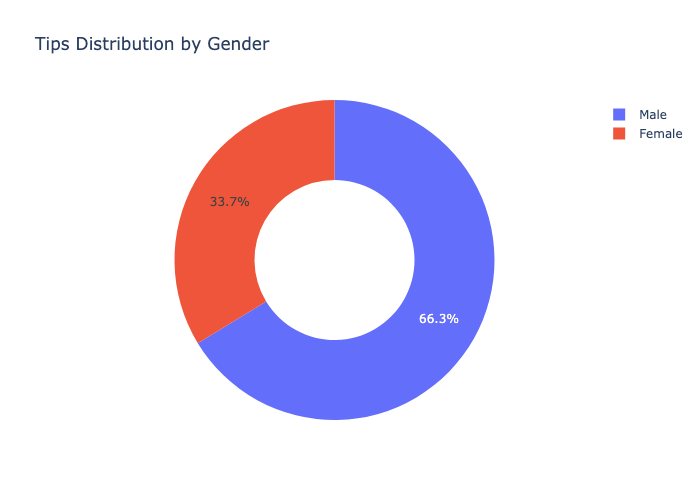

In [106]:
figure = px.pie(df, 
                 values='tip', 
                 names='sex', 
                 hole=0.5, 
                 title="Tips Distribution by Gender")

figure.show('png')

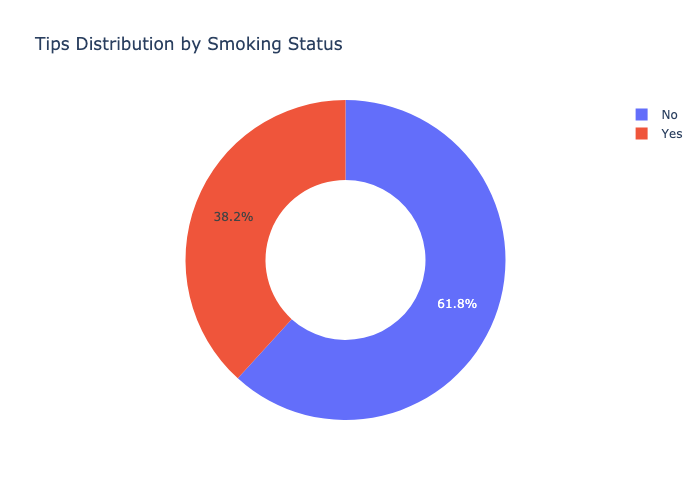

In [107]:
figure = px.pie(df, 
                 values='tip', 
                 names='smoker', 
                 hole=0.5, 
                 title="Tips Distribution by Smoking Status")

figure.show('png')

In [108]:
figure = px.pie(df, 
                 values='tip', 
                 names='time', 
                 hole=0.5, 
                 title="Tips Distribution by Time of Day")

figure.show()

## Modelling

In [109]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [110]:
x = np.array(df[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]])
y = np.array(df["tip"])


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [112]:
algo_test(x,y)

,R_Squared,RMSE,MAE
SVR,0.573327,0.730294,0.569697
ElasticNet,0.548936,0.750877,0.623182
Lasso,0.546712,0.752727,0.625610
Ridge,0.444996,0.832910,0.667930
Linear,0.442940,0.834451,0.668573
mlp_regressor,0.383724,0.877683,0.724056
KNeighborsRegressor,0.355030,0.897883,0.753238
Gradient Boosting,0.354751,0.898077,0.728598
AdaBoost,0.304295,0.932529,0.722286
XGBRegressor,0.180812,1.011910,0.733110


In [113]:
model = SVR()
model.fit(x, y)

SVR()

In [114]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]

features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.66453308])

In [115]:
from joblib import dump
dump(model, "model.joblib")

['model.joblib']